<a href="https://colab.research.google.com/github/frank-morales2020/MLxDL/blob/main/MCP_DEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MCP: Model Context Protocol

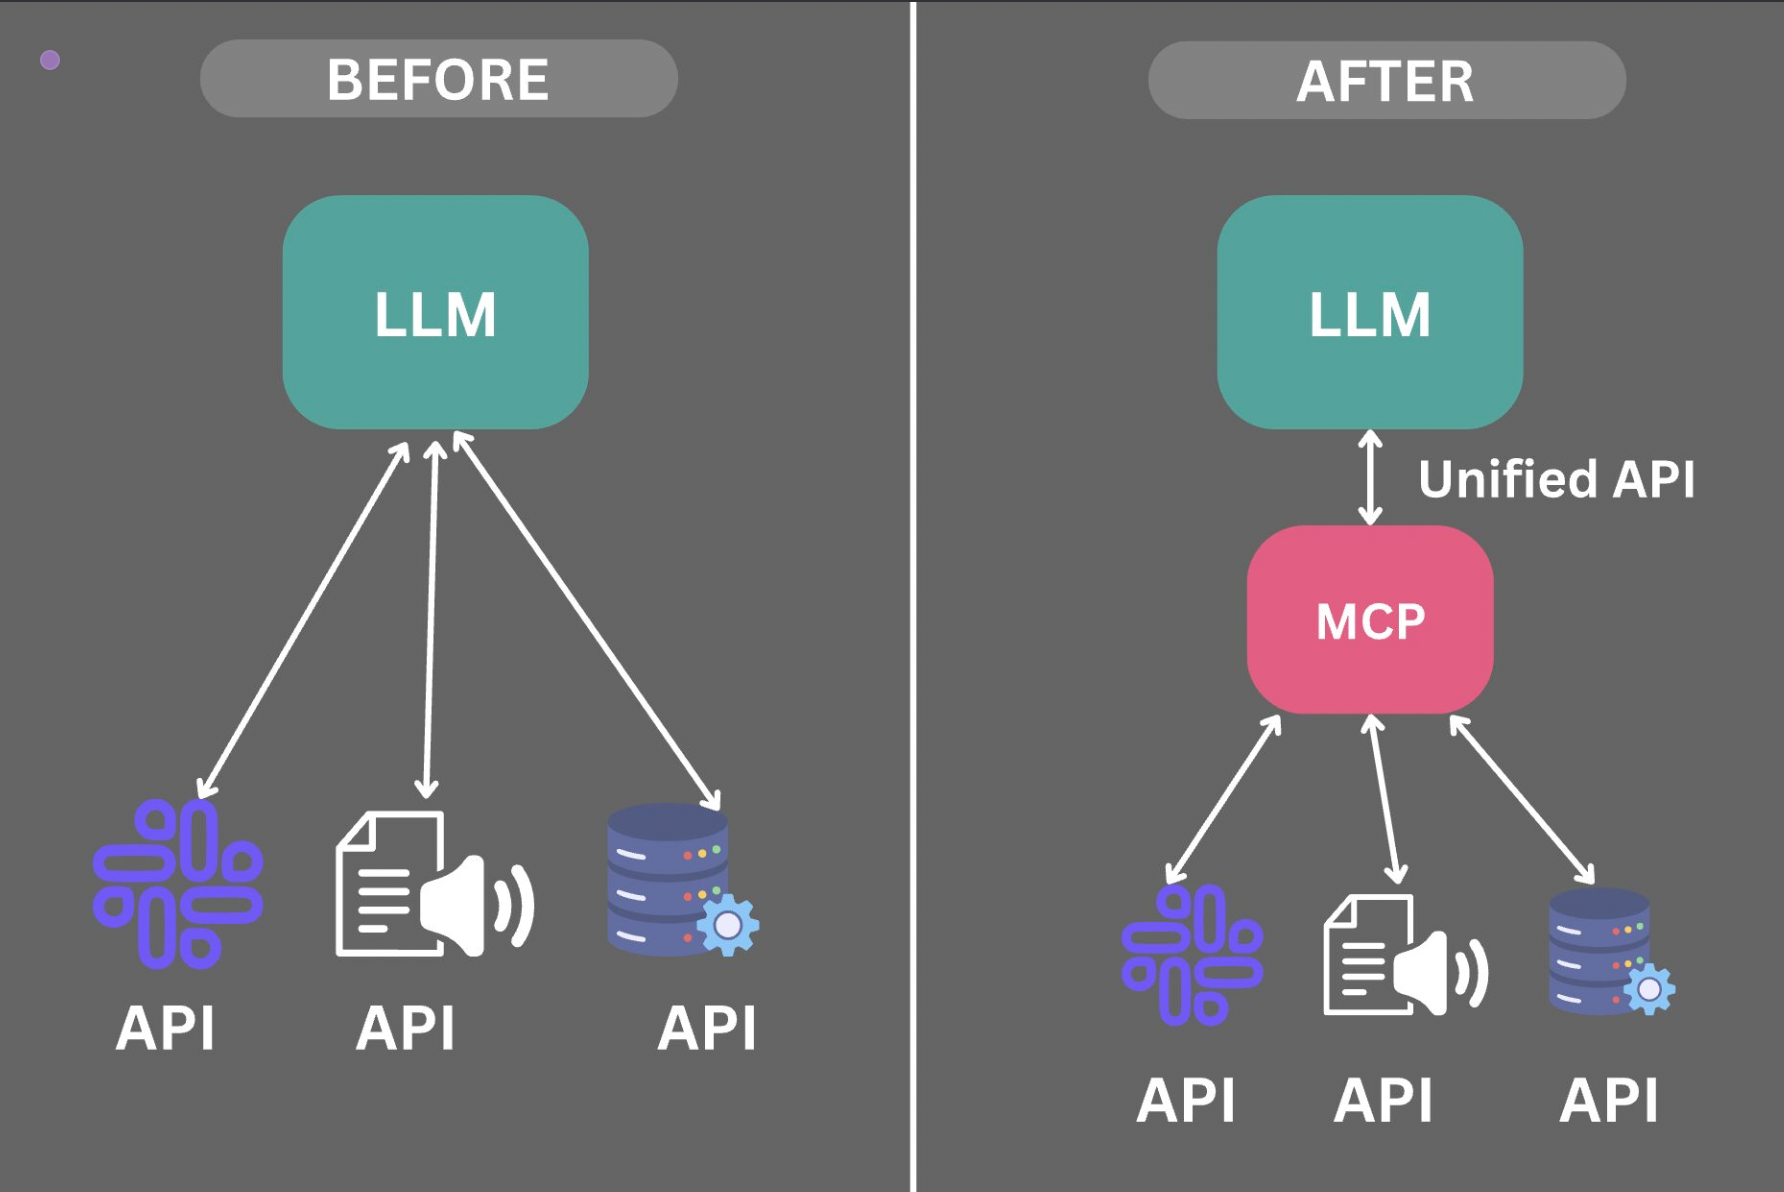

In [1]:
# BEFORE (Conceptual Code - LLM interacting directly with APIs)

class WeatherAPI:
    def get_current_temperature(self, city_code):
        # Simulate fetching temperature from a specific weather API
        if city_code == "CYUL":
            return 10  # Celsius
        elif city_code == "KJFK":
            return 15  # Celsius
        else:
            return None

class NewsAPI:
    def get_latest_headlines(self, topic):
        # Simulate fetching news headlines from a specific news API
        if topic == "aviation":
            return ["New advancements in electric aircraft", "Airport expansion plans announced"]
        else:
            return []

class FlightDataAPI:
    def get_airport_details(self, airport_code):
        # Simulate fetching airport details from a specific flight data API
        if airport_code == "CYUL":
            return {"name": "Montreal-Trudeau International Airport", "timezone": "EST"}
        elif airport_code == "KJFK":
            return {"name": "John F. Kennedy International Airport", "timezone": "EDT"}
        else:
            return None

class LLM:
    def __init__(self):
        self.weather_api = WeatherAPI()
        self.news_api = NewsAPI()
        self.flight_data_api = FlightDataAPI()

    def answer_question(self, query):
        if "temperature in Montreal" in query:
            temp = self.weather_api.get_current_temperature("CYUL")
            return f"The current temperature in Montreal is {temp} degrees Celsius."
        elif "aviation news" in query:
            headlines = self.news_api.get_latest_headlines("aviation")
            return f"Latest aviation news: {', '.join(headlines)}"
        elif "details about JFK airport" in query:
            details = self.flight_data_api.get_airport_details("KJFK")
            return f"Details about JFK: {details}"
        else:
            return "I can't answer that question yet."

# Example usage BEFORE MCP
llm_before = LLM()
print("BEFORE MCP:")
print(llm_before.answer_question("What is the temperature in Montreal?"))
print(llm_before.answer_question("Tell me the latest aviation news."))
print(llm_before.answer_question("What are the details about JFK airport?"))

print("\n" + "="*30 + "\n")

# AFTER (Conceptual Code - LLM interacting with MCP's Unified API)

class MCP:
    def __init__(self):
        self.weather_api = WeatherAPI()
        self.news_api = NewsAPI()
        self.flight_data_api = FlightDataAPI()

    def handle_request(self, service, query_params=None):
        if service == "weather":
            city_code = query_params.get("city_code")
            return self.weather_api.get_current_temperature(city_code)
        elif service == "news":
            topic = query_params.get("topic")
            return self.news_api.get_latest_headlines(topic)
        elif service == "flight_data":
            airport_code = query_params.get("airport_code")
            return self.flight_data_api.get_airport_details(airport_code)
        else:
            return None

class UnifiedLLM:
    def __init__(self, mcp):
        self.mcp = mcp

    def answer_question(self, query):
        if "temperature in Montreal" in query:
            temp = self.mcp.handle_request("weather", {"city_code": "CYUL"})
            return f"The current temperature in Montreal is {temp} degrees Celsius (via MCP)."
        elif "aviation news" in query:
            headlines = self.mcp.handle_request("news", {"topic": "aviation"})
            return f"Latest aviation news (via MCP): {', '.join(headlines)}"
        elif "details about JFK airport" in query:
            details = self.mcp.handle_request("flight_data", {"airport_code": "KJFK"})
            return f"Details about JFK (via MCP): {details}"
        else:
            return "I can't answer that question yet (via MCP)."

# Example usage AFTER MCP
mcp = MCP()
llm_after = UnifiedLLM(mcp)
print("AFTER MCP:")
print(llm_after.answer_question("What is the temperature in Montreal?"))
print(llm_after.answer_question("Tell me the latest aviation news."))
print(llm_after.answer_question("What are the details about JFK airport?"))

BEFORE MCP:
The current temperature in Montreal is 10 degrees Celsius.
Latest aviation news: New advancements in electric aircraft, Airport expansion plans announced
Details about JFK: {'name': 'John F. Kennedy International Airport', 'timezone': 'EDT'}


AFTER MCP:
The current temperature in Montreal is 10 degrees Celsius (via MCP).
Latest aviation news (via MCP): New advancements in electric aircraft, Airport expansion plans announced
Details about JFK (via MCP): {'name': 'John F. Kennedy International Airport', 'timezone': 'EDT'}
